In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

This notebook is refering to a data analysis investigation on the Mena Region for the Spread of COVID based on some statistics to get an overview about the COVID impact on each of the 22 countries for ME and estimation of the Vaccination Progress on these countries.

# MER-CountriesCOVID Dataset

In this Section, We focused on the Spread of COVID-19 on the MER and established some statistics for each country about the number of Cases and Deaths per day with a mean ratio calculated below.

# Statistics based on MER-CountriesCOVID Dataset

We Calculate the ratio : a mean number of cases and deaths per day for each country

Please Check on the results below with some plots of this ratio.

Text(0.5, 1.0, 'new_cases_ratio per day Given by Menar Countries')

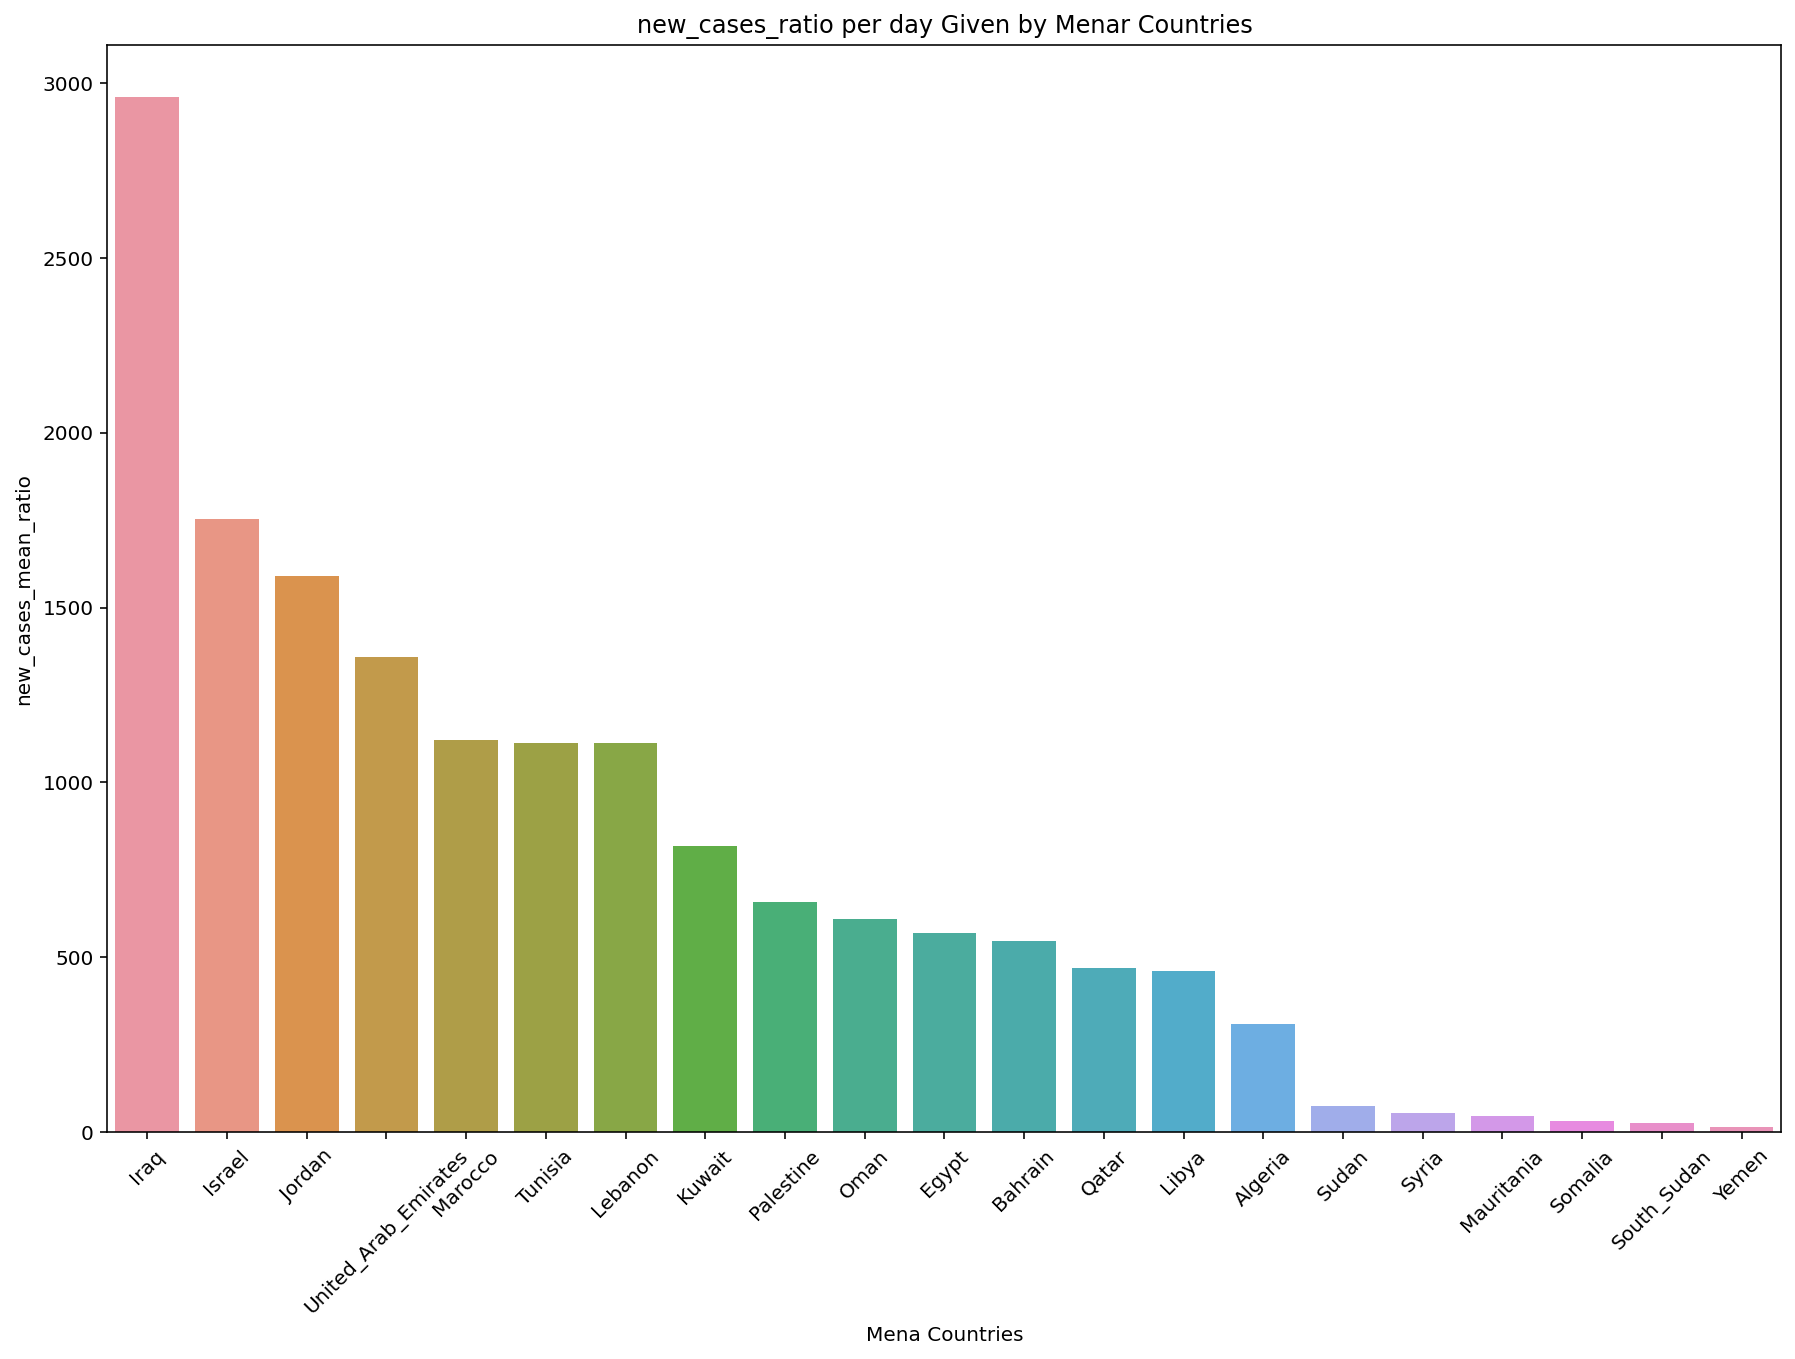

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%config InlineBackend.figure_format = 'retina'
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


#!pip install pandas-bokeh
import pandas_bokeh
#pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
# Create Bokeh-Table with DataFrame:
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource


# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)


url = 'https://raw.githubusercontent.com/inception-labs/covid-vaccine-mena/main/Demographics/MER-CountriesCOVID.csv'
df = pd.read_csv(url, index_col=0)
#df = pd.read_csv('../Demographics/MER-CountriesCOVID.csv')
#df.head()
df = df.dropna()#### this will drop all rows with a single missing value
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.sort_values(by="date")

#df= df.reset_index().sort_values('date')
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count
d = {"ARE": "United_Arab_Emirates" , "BHR" : 'Bahrain',"DZA": 'Algeria',"EGY": 'Egypt',"IRQ": 'Iraq',  "ISR": 'Israel', "JOR": 'Jordan',"KWT":'Kuwait',"LBN":'Lebanon',"LBY":'Libya',  "MAR":'Marocco' ,"MRT": 'Mauritania', "OMN":'Oman',"PSE": 'Palestine', "QAT":'Qatar',"SAU":'Saudi-Arabia',"SOM":'Somalia',"SDN":'Sudan',"SSD":'South_Sudan',"SYR":'Syria',"TUN":'Tunisia',"YEM":'Yemen'}
df['iso_code'] = df.replace({"iso_code": d})


list_country = ['Algeria', 'Bahrain', 'Egypt', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya',
       'Mauritania', 'Marocco', 'Oman', 'Palestine', 'Qatar', 'Qatar', 'Somalia', 'South_Sudan', 'Sudan',
       'Syria', 'Tunisia', 'United_Arab_Emirates', 'Yemen']

#print(len(list_country))### numbers of countries in Mena region 22

new_deaths_ratio = []
new_cases_ratio = []
 

for i in list_country:
    x = df[df['iso_code']==i]

    new_deaths_rate = sum(x.new_deaths)/len(x)
    new_deaths_ratio.append(new_deaths_rate)
    new_cases_rate = sum(x.new_cases)/len(x)
    new_cases_ratio.append(new_cases_rate)

 
    
data = pd.DataFrame({'list_country': list_country,'new_cases_ratio':new_cases_ratio,'new_deaths_ratio':new_deaths_ratio})


new_index = (data['new_cases_ratio'].sort_values(ascending =False)).index.values
sorted_data = data.reindex(new_index)


new_index_1= (data['new_deaths_ratio'].sort_values(ascending =False)).index.values
sorted_data_1 = data.reindex(new_index_1)



# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['list_country'], y=sorted_data['new_cases_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('Mena Countries')
plt.ylabel('new_cases_mean_ratio')
plt.title('new_cases_ratio per day Given by Menar Countries')


We classify each country based on this new_cases_ratio (from the highest to the lowest new_cases_ratio), we collect our data for each country and sum up per day all the new_cases to calculate the mean value represented by this ratio.

This new_cases_ratio represents the mean value of new_cases per day calculated over a period of time (since the beginning of the COVID-19 Pandemic until today)for each country.

The same approach is applied on the new_deaths_ratio! We are taking care about the precision of the data to get the best overview about COVID-19 impact on the Mena Region. The ability to describe the situation based on new_deaths and new_cases ratio is really interesting to do an estimation  for the Spread of COVID-19 over each country.

Text(0.5, 1.0, 'new_deaths_ratio per day  Given by Menar Countries')

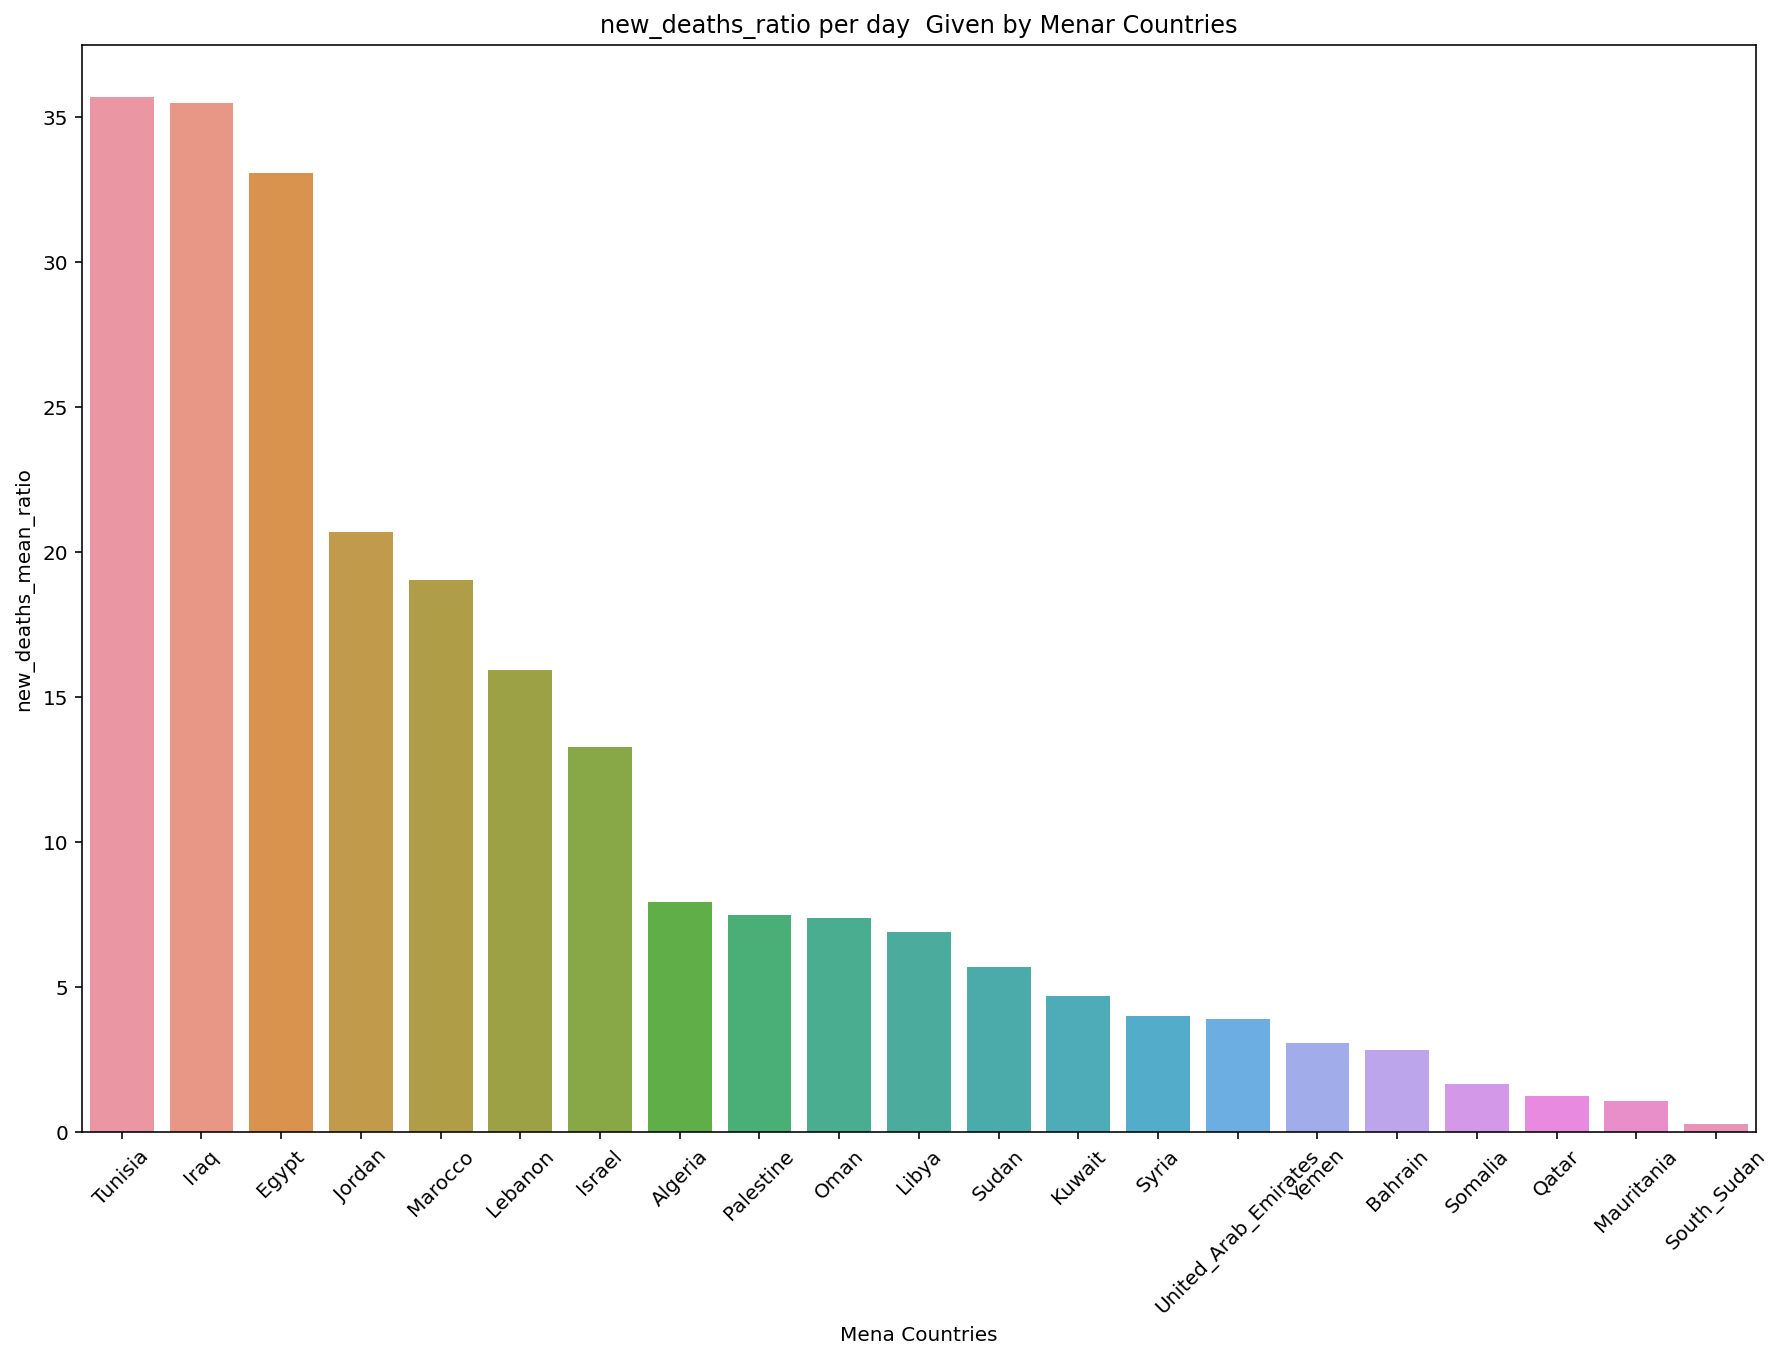

In [2]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data_1['list_country'], y=sorted_data_1['new_deaths_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('Mena Countries')
plt.ylabel('new_deaths_mean_ratio')
plt.title('new_deaths_ratio per day  Given by Menar Countries')

# Data analysis of the Spread of Covid-19

For this Part of our Data Analysis, We figure out the max value for total_cases and total_deaths (last value updated from the MER-CountriesCOVID Dataset). Through this data, we plot lines to distinguish between each country the number of total_cases, new_cases, total_deaths and new_deaths. This estimation is based on the max value for the last updated date!

In [3]:
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")


covid_total = df.groupby(['iso_code'])[ 'total_cases','total_deaths'].max()
covid_total=covid_total.reset_index().sort_values('iso_code')

covid_total_new = df.groupby(['iso_code'])[ 'new_cases','new_deaths'].max()
covid_total_new=covid_total_new.reset_index().sort_values('iso_code')



x=[i for i in covid_total.iso_code ]
fig = go.Figure()
fig.update_layout(template='plotly_white')
fig.add_trace(go.Scatter(x=x, 
                         y=covid_total['total_cases'],
                         mode='lines+markers',
                         name='total_cases',
                         line=dict(color='rgb(102, 102, 255)', width=2)))
fig.add_trace(go.Scatter(x=x, 
                         y=covid_total['total_deaths'],
                         mode='lines+markers',
                         name='total_deaths',
                         line=dict(color='rgb(255, 102, 102)', width=2)))

fig.update_layout(
    title = 'Spread of COVID-19 in '+' the Mena Region'+' with a focus on total_cases and total_deaths',
    xaxis_tickformat = '%d %B (%a)<br>%Y'
)
fig.show()

In [4]:
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

x=[i for i in covid_total_new.iso_code ]
fig = go.Figure()
fig.update_layout(template='plotly_white')
fig.add_trace(go.Scatter(x=x, 
                         y=covid_total_new['new_cases'],
                         mode='lines+markers',
                         name='new_cases',
                         line=dict(color='rgb(102, 102, 255)', width=2)))
fig.add_trace(go.Scatter(x=x, 
                         y=covid_total_new['new_deaths'],
                         mode='lines+markers',
                         name='new_deaths',
                         line=dict(color='rgb(255, 102, 102)', width=2)))

fig.update_layout(
    title = 'Spread of COVID-19  in '+' the Mena Region'+' with a focus on new_cases and new_deaths',
    xaxis_tickformat = '%d %B (%a)<br>%Y'
)
fig.show()

# OWID_Dataset

Our World In Data (OWID) is an online publication that presents empirical research and data that shows how living conditions around the world change over time.Online publications on global development use interactive data visualizations (tables and maps) to present the results of development research and explain the causes and consequences of observed changes. 

OWID dataset is used to evaluate the impact of Vaccination for each country. We are concerned about the Vaccination Progress on the Mena Region. Thanks to OWID dataset, we are able to track down accurately the Total_Fully_Vaccinated ( People who received two doses of the Vaccine ) and the Number of Total_Vaccinations that represents the Total Number of Vaccines delivered!

# Vaccination Progress Investigation

In [5]:
#import warnings
#warnings.filterwarnings("ignore")
url = 'https://raw.githubusercontent.com/inception-labs/covid-vaccine-mena/main/Distribution/OWID-Vaccine-Progress.csv'
df_owid = pd.read_csv(url, index_col=0)


#df_owid = pd.read_csv('../Distribution/OWID-Vaccine-Progress.csv')
df_owid = df_owid.drop(["Unnamed: 0"], axis = 1)
df_owid = df_owid.dropna()
d = {"ARE": "United_Arab_Emirates" , "BHR" : 'Bahrain',"DZA": 'Algeria',"EGY": 'Egypt',"IRQ": 'Iraq',  "ISR": 'Israel', "JOR": 'Jordan',"KWT":'Kuwait',"LBN":'Lebanon',"LBY":'Libya',  "MAR":'Marocco' ,"MRT": 'Mauritania', "OMN":'Oman',"PSE": 'Palestine', "QAT":'Qatar',"SAU":'Saudi-Arabia',"SOM":'Somalia',"SDN":'Sudan',"SSD":'South_Sudan',"SYR":'Syria',"TUN":'Tunisia',"YEM":'Yemen'}
df_owid['Country'] = df_owid.replace({"Country": d})
#df_owid.head()

vaccination_total = df_owid.groupby(['Country'])[ 'Total_Fully_Vaccinated','Total_Vaccinations'].max()
vaccination_total=vaccination_total.reset_index().sort_values('Country')




x=[i for i in vaccination_total.Country ]
fig = go.Figure()
fig.update_layout(template='plotly_white')
fig.add_trace(go.Scatter(x=x, 
                         y=vaccination_total['Total_Fully_Vaccinated'],
                         mode='lines+markers',
                         name='Total_Fully_Vaccinated',
                         line=dict(color='rgb(102, 102, 255)', width=2)))
fig.add_trace(go.Scatter(x=x, 
                         y=vaccination_total['Total_Vaccinations'],
                         mode='lines+markers',
                         name='Total_Vaccinations Received',
                         line=dict(color='rgb(255, 102, 102)', width=2)))

fig.update_layout(
    title = 'Vaccination_Progress  in '+' the Mena Region'+' with a focus on Total_Fully_Vaccinated and Total_Vaccinations',
    xaxis_tickformat = '%d %B (%a)<br>%Y'
)
fig.show()


In [6]:
#%%capture

from IPython.display import Javascript
from nbconvert import HTMLExporter
import time
import os

#!jupyter nbconvert Mena_Region_Countries_Covid_Investigation.ipynb --to html  --no-input  --template full --output Mena_Region_Countries_Covid_Investigation.html
string_ = os.getcwd()
string_ = string_.replace('Scripts', '')
string_1 = string_ + str('Reports')


current_file = 'Mena_Region_Countries_Covid_Investigation.ipynb'
output_file =  str(string_1) + '/Mena_Region_Countries_Covid_Investigation.html'
!echo "{output_file}"
!jupyter nbconvert Mena_Region_Countries_Covid_Investigation.ipynb --to html --template lab   --no-input   --output "{output_file}"

/Users/bachali/Desktop/covid-vaccine-mena/Reports/Mena_Region_Countries_Covid_Investigation.html
[NbConvertApp] Converting notebook Mena_Region_Countries_Covid_Investigation.ipynb to html
[NbConvertApp] Writing 796303 bytes to /Users/bachali/Desktop/covid-vaccine-mena/Reports/Mena_Region_Countries_Covid_Investigation.html
